<!DOCTYPE html>
<html>
<body>
<div align="center">
<h3>Made by Manthan A Panchal</h3>
    
<h1>Logistic Regression Model on Bank Data</h1>

<h3>Follow Me on - <a href="https://www.linkedin.com/in/manthan-panchal-046b3b198/">LinkedIn</a>&nbsp; 
</div>

</div>
</body>
</html>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

from sklearn import preprocessing                    # for lable encoders  
from sklearn.linear_model import LogisticRegression  # model structure
from sklearn import metrics                          # model evaluation functions
from sklearn.tree import DecisionTreeClassifier      # to get important features
from sklearn.metrics import classification_report

plt.style.use('seaborn-darkgrid')
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('bank-full.csv', delimiter=';')
df.head(25)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

### The data set contains 45211 entries which are enough to build a working logistic regression model

### We can see that the columns are filled with strings values they need to be ONE HOT ENCODED in order to build the model

In [4]:
le = preprocessing.LabelEncoder()

df["job"]      = le.fit_transform(df['job'])
df["marital"]  = le.fit_transform(df['marital'])
df["education"]= le.fit_transform(df['education'])
df["default"]  = le.fit_transform(df['default'])
df["housing"]  = le.fit_transform(df['housing'])
df["loan"]     = le.fit_transform(df['loan'])
df["contact"]  = le.fit_transform(df['contact'])
df["month"]    = le.fit_transform(df['month'])
df["poutcome"] = le.fit_transform(df['poutcome'])
df['y']        = le.fit_transform(df['y'])

In [5]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


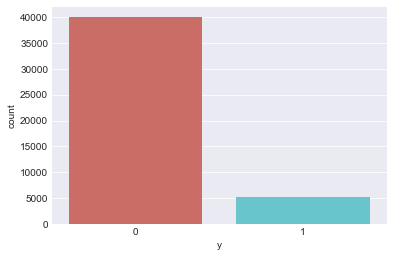

In [6]:
sns.countplot(x = 'y', data = df, palette="hls")
plt.show()

In [7]:
array = df.values  # converting it to a array
array

array([[58,  4,  1, ...,  0,  3,  0],
       [44,  9,  2, ...,  0,  3,  0],
       [33,  2,  1, ...,  0,  3,  0],
       ...,
       [72,  5,  1, ...,  3,  2,  1],
       [57,  1,  1, ...,  0,  3,  0],
       [37,  2,  1, ..., 11,  1,  0]], dtype=int64)

In [8]:
X = array[:,0:-1]
X

array([[ 58,   4,   1, ...,  -1,   0,   3],
       [ 44,   9,   2, ...,  -1,   0,   3],
       [ 33,   2,   1, ...,  -1,   0,   3],
       ...,
       [ 72,   5,   1, ..., 184,   3,   2],
       [ 57,   1,   1, ...,  -1,   0,   3],
       [ 37,   2,   1, ..., 188,  11,   1]], dtype=int64)

In [9]:
y = array[:,-1]
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [10]:
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

In [11]:
model.feature_importances_

array([0.09940676, 0.04254325, 0.01862339, 0.02582913, 0.00175606,
       0.12166501, 0.02304569, 0.00880203, 0.01722664, 0.08703576,
       0.10035969, 0.29284199, 0.03708934, 0.05650548, 0.01002034,
       0.05724945])

### The higher the score the significant is the feature

In [24]:
for i in range(0,16):
    print('Feature',i, model.feature_importances_[i])

Feature 0 0.09940676308092831
Feature 1 0.04254324833654978
Feature 2 0.018623387707769307
Feature 3 0.025829126545862162
Feature 4 0.0017560579227543867
Feature 5 0.12166501017738028
Feature 6 0.023045689570137293
Feature 7 0.008802034706588685
Feature 8 0.017226639352154807
Feature 9 0.08703576201149762
Feature 10 0.10035968518290961
Feature 11 0.292841987461532
Feature 12 0.03708934445289935
Feature 13 0.05650548210029063
Feature 14 0.010020336342904498
Feature 15 0.05724944504784125


### Spiting the data to build the model

### We choose the important features only to reduce the complexity of the model

In [13]:
x = df.iloc[:,[0, 5, 6, 9, 11, 13, 15]]
y = df.iloc[:, -1] 

### Building The Model

In [14]:
classifier  = LogisticRegression()
classifier.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
classifier.coef_

array([[-2.05205645e-02,  2.25138513e-05, -1.51632220e+00,
        -2.02036608e-02,  3.83117288e-03,  8.19154674e-04,
        -3.86461264e-01]])

In [16]:
classifier.predict_proba(x) # gives the probablity score of the output  of the data 

array([[0.96951531, 0.03048469],
       [0.97445177, 0.02554823],
       [0.97595587, 0.02404413],
       ...,
       [0.18797246, 0.81202754],
       [0.77765989, 0.22234011],
       [0.60474123, 0.39525877]])

### Model Evaluation

#### We evaluate the model on basis of confusion matrix and roc curve 

#### We pridict the output for the existing data and then compare it to the actual values of the datatset

In [17]:
y_pridiction = classifier.predict(x)

In [18]:
y_pridiction

array([0, 0, 0, ..., 1, 0, 0])

In [19]:
df['y_pridiction'] = y_pridiction

In [20]:
df.head(25)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pridiction
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0,0
7,42,2,0,2,1,2,1,0,2,5,8,380,1,-1,0,3,0,0
8,58,5,1,0,0,121,1,0,2,5,8,50,1,-1,0,3,0,0
9,43,9,2,1,0,593,1,0,2,5,8,55,1,-1,0,3,0,0


In [26]:
cross = pd.crosstab(y_pridiction, y)
cross

y,0,1
row_0,,
0,39094,4242
1,828,1047


In [30]:
sensitivity = cross.iloc[0,1]/(cross.iloc[0,1]+cross.iloc[1,1])
sensitivity

0.8020419739081112

In [31]:
specificity = cross.iloc[0,0]/(cross.iloc[0,0]+cross.iloc[1,0])
specificity

0.9792595561344623

In [32]:
accuracy = (cross.iloc[0,0]+cross.iloc[1,1]) / (cross.iloc[0,0]+cross.iloc[0,1]+cross.iloc[1,0]+cross.iloc[1,1])
accuracy

0.8878591493220677

In [33]:
print(classification_report(y, y_pridiction))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.56      0.20      0.29      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.59      0.62     45211
weighted avg       0.86      0.89      0.86     45211



In [34]:
from sklearn.metrics import roc_auc_score,roc_curve

In [35]:
Logit_roc_score = roc_auc_score(y, classifier.predict(x))
Logit_roc_score

0.5886087911131755

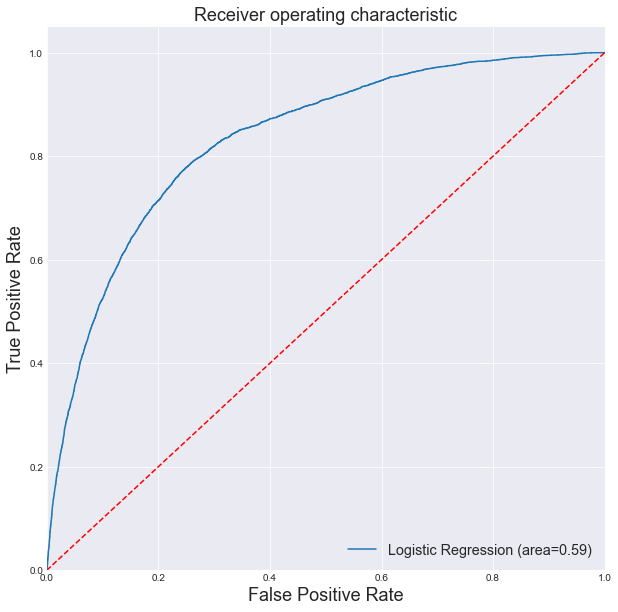

In [43]:
plt.figure(figsize=(10,10))

fpr, tpr, thresholds = roc_curve(y,classifier.predict_proba(x)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('Receiver operating characteristic', fontsize = 18)
plt.legend(loc="lower right", fontsize = 'x-large')
plt.show()  